In [1]:
! pip install pandas
! pip install matplotlib
! pip install gensim

Traceback (most recent call last):
  File "/Users/puneetsandher/anaconda3/bin/pip", line 5, in <module>
    from pip._internal.cli.main import main
ModuleNotFoundError: No module named 'pip._internal.cli'
Traceback (most recent call last):
  File "/Users/puneetsandher/anaconda3/bin/pip", line 5, in <module>
    from pip._internal.cli.main import main
ModuleNotFoundError: No module named 'pip._internal.cli'
Traceback (most recent call last):
  File "/Users/puneetsandher/anaconda3/bin/pip", line 5, in <module>
    from pip._internal.cli.main import main
ModuleNotFoundError: No module named 'pip._internal.cli'


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("../../processedDataset/preprocessedPostData.csv")

df.head()

,monthSin,monthCos,daySin,dayCos,hourSin,hourCos,weekdaySin,weekdayCos,hashtagVectors,nLikes,nShares,nFollowers,nComments,nViews,nAccountTotalLikes,postYear
0,-0.5,0.866025,0.988468,0.151428,-0.965926,-0.258819,-0.974928,-0.222521,[-0.06394912 -0.09934936 0.05018172 0.209499...,7.593374,1.386294,13.815512,2.944439,9.457279,15.363073,1.0
1,-0.5,0.866025,0.848644,0.528964,-0.258819,0.965926,0.433884,-0.900969,[-0.07862883 -0.10937244 0.03460374 0.202062...,8.905580,2.302585,13.815512,3.951244,10.874285,15.363073,1.0
2,-0.5,0.866025,0.724793,0.688967,-0.258819,-0.965926,0.974928,-0.222521,[-0.10907231 -0.05049138 0.07886021 0.172413...,8.439015,2.484907,13.815512,3.332205,10.537442,15.363073,1.0
3,-0.5,0.866025,0.571268,0.820763,-0.258819,0.965926,0.781831,0.623490,[-4.42794785e-02 -8.95778090e-02 4.70666662e-...,8.978660,1.945910,13.815512,3.218876,10.843514,15.363073,1.0
4,-0.5,0.866025,0.571268,0.820763,-0.258819,-0.965926,0.781831,0.623490,[-1.02420643e-01 -5.03370464e-02 7.44658336e-...,8.080237,2.302585,13.815512,2.708050,10.114599,15.363073,1.0


In [4]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, f1_score 

In [5]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

def trainModel(model, modelName, x , y):
    scoring = {
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'R2': 'r2',
    'RMSE': make_scorer(mean_squared_error, squared=False, greater_is_better=False),
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False)
    }

    # Perform cross-validation and get scores for each metric
    # cvResults = cross_validate(model, xTrain, yTrain, cv=5, scoring=scoring, return_train_score=True)
    cvResults = cross_validate(model, x, y, cv=5, scoring=scoring, return_train_score=True)

    # Convert the results to a DataFrame for better readability
    resultsDf = pd.DataFrame(cvResults)

    # Since 'greater_is_better=False', the scores for MSE, RMSE, and MAE will be negative. We will negate them for correct interpretation
    resultsDf['test_MSE'] = -resultsDf['test_MSE']
    resultsDf['test_RMSE'] = -resultsDf['test_RMSE']
    resultsDf['test_MAE'] = -resultsDf['test_MAE']

    print(f'Model: {modelName}')

    print("Cross-validation results (each fold):")
    print(resultsDf[['test_MSE', 'test_R2', 'test_RMSE', 'test_MAE']])

    # Print mean and standard deviation of the metrics
    meanMetrics = resultsDf[['test_MSE', 'test_R2', 'test_RMSE', 'test_MAE']].mean()
    stdMetrics = resultsDf[['test_MSE', 'test_R2', 'test_RMSE', 'test_MAE']].std()

    print("\nMean of metrics:")
    print(meanMetrics)

    print("\nStandard Deviation of metrics:")
    print(stdMetrics)
    

    plotResults = {
    'MSE': resultsDf['test_MSE'],
    'RMSE': resultsDf['test_RMSE'],
    'MAE': resultsDf['test_MAE'],
    'R2': resultsDf['test_R2']
    }        
    plotResultsDf = pd.DataFrame(plotResults)   
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=plotResultsDf, palette="Set2")
    plt.title('Distribution of Cross-Validation Performance Metrics')
    plt.xlabel('Performance Metrics')
    plt.ylabel('Metric Values')
    plt.show()

    return resultsDf

In [6]:
x = df[['weekdaySin', 'weekdayCos', 'monthSin', 'monthCos', 'nViews']]

y = df['nLikes']

Model: Linear Regression
Cross-validation results (each fold):
   test_MSE   test_R2  test_RMSE  test_MAE
0  0.183455  0.965631   0.428317  0.328915
1  0.212137  0.967655   0.460584  0.359644
2  0.255662  0.964093   0.505631  0.394826
3  0.241194  0.952810   0.491115  0.380179
4  0.269231  0.950676   0.518875  0.397840

Mean of metrics:
test_MSE     0.232336
test_R2      0.960173
test_RMSE    0.480904
test_MAE     0.372281
dtype: float64

Standard Deviation of metrics:
test_MSE     0.034573
test_R2      0.007835
test_RMSE    0.036523
test_MAE     0.028567
dtype: float64


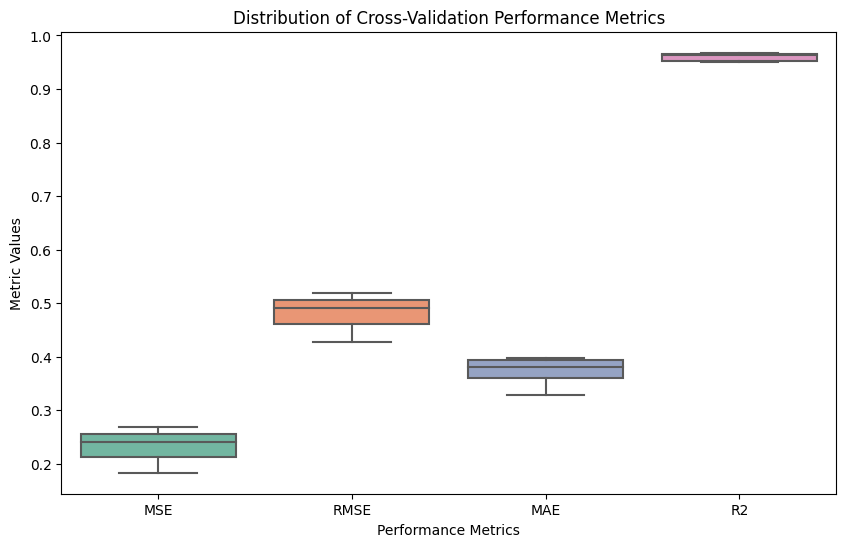

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

linearResults = trainModel(lr, "Linear Regression", x, y)

Model: Random Forest Regressor
Cross-validation results (each fold):
   test_MSE   test_R2  test_RMSE  test_MAE
0  0.184967  0.965348   0.430078  0.331011
1  0.213001  0.967524   0.461520  0.359342
2  0.255678  0.964091   0.505647  0.393342
3  0.240903  0.952867   0.490819  0.379606
4  0.268257  0.950854   0.517935  0.397622

Mean of metrics:
test_MSE     0.232561
test_R2      0.960137
test_RMSE    0.481200
test_MAE     0.372185
dtype: float64

Standard Deviation of metrics:
test_MSE     0.033638
test_R2      0.007687
test_RMSE    0.035498
test_MAE     0.027432
dtype: float64


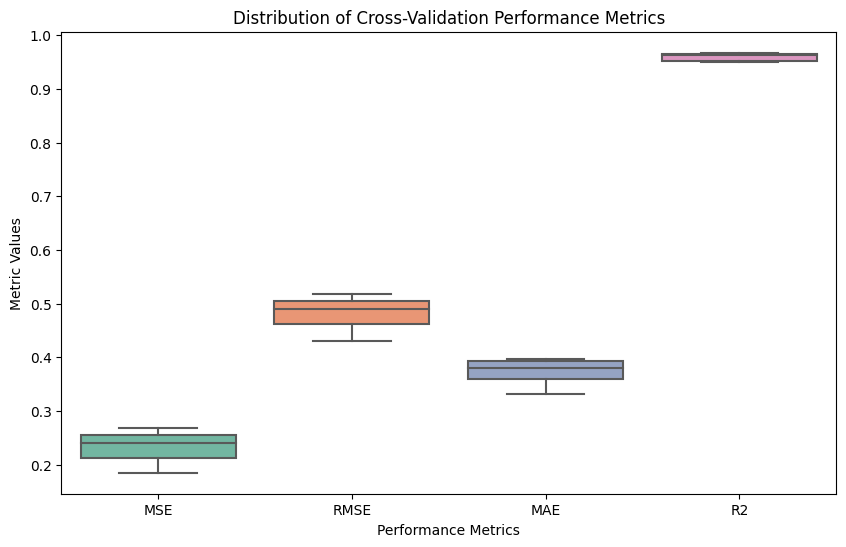

In [8]:
from sklearn.ensemble import RandomForestRegressor

# rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)

rfResults = trainModel(rf, "Random Forest Regressor", x, y)

Model: Gradient Boosting Regressor
Cross-validation results (each fold):
   test_MSE   test_R2  test_RMSE  test_MAE
0  0.178291  0.966599   0.422245  0.325553
1  0.205607  0.968651   0.453439  0.354064
2  0.248513  0.965097   0.498510  0.388403
3  0.234097  0.954198   0.483835  0.374284
4  0.260429  0.952289   0.510322  0.392082

Mean of metrics:
test_MSE     0.225387
test_R2      0.961367
test_RMSE    0.473670
test_MAE     0.366877
dtype: float64

Standard Deviation of metrics:
test_MSE     0.033346
test_R2      0.007552
test_RMSE    0.035769
test_MAE     0.027502
dtype: float64


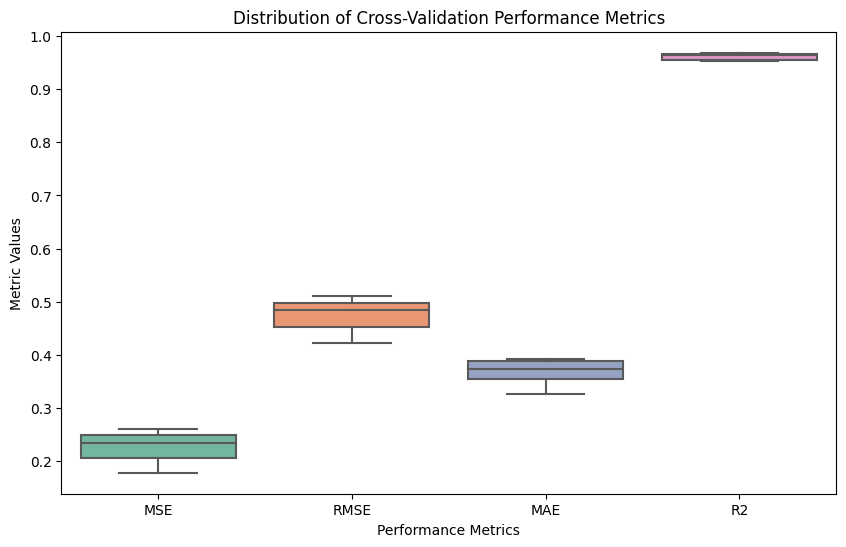

In [9]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gbrResults = trainModel(gbr, "Gradient Boosting Regressor", x, y)


Model: Support Vector Regression
Cross-validation results (each fold):
   test_MSE   test_R2  test_RMSE  test_MAE
0  0.180314  0.966220   0.424634  0.320773
1  0.209570  0.968047   0.457788  0.350797
2  0.252401  0.964551   0.502395  0.384708
3  0.242157  0.952621   0.492095  0.374416
4  0.274892  0.949639   0.524302  0.396931

Mean of metrics:
test_MSE     0.231867
test_R2      0.960216
test_RMSE    0.480242
test_MAE     0.365525
dtype: float64

Standard Deviation of metrics:
test_MSE     0.037194
test_R2      0.008452
test_RMSE    0.039271
test_MAE     0.030220
dtype: float64


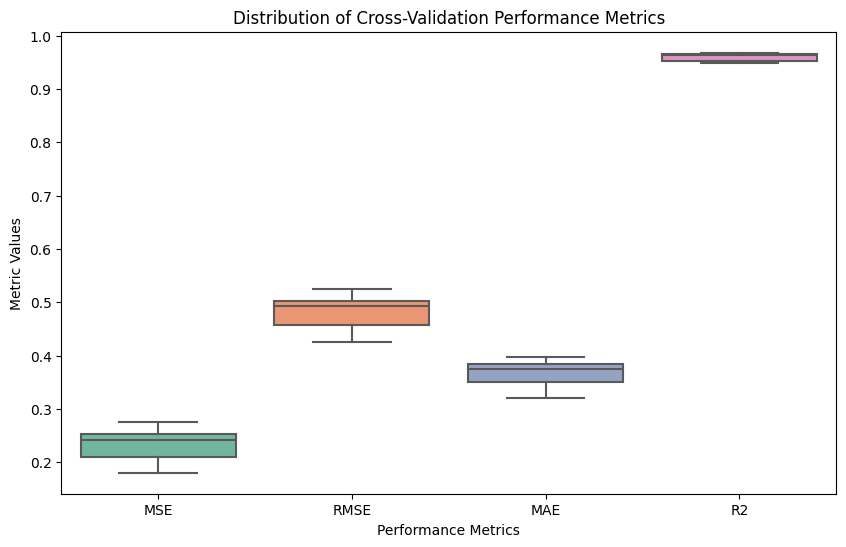

ValueError: too many values to unpack (expected 2)

In [10]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

meanSVR, stdSVR = trainModel(svr, "Support Vector Regression", x, y)



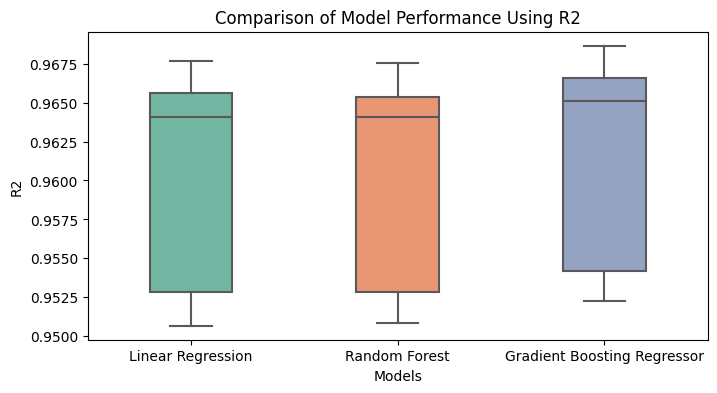

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


plotResults = {
    'Linear Regression': linearResults['test_MSE'],
    'Random Forest': rfResults['test_MSE'], 
    'Gradient Boosting Regressor': gbrResults['test_MSE']
}

plotResultsDf = pd.DataFrame(plotResults)   
plt.figure(figsize=(8, 4))
sns.boxplot(data=plotResultsDf, palette="Set2", width=0.4)
plt.title('Comparison of Model Performance Using MSE')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.show()